# Introduction

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

The main aim of this project is to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. A Robust prediction Model will allow Rossman store managers to stay focused on what’s most important to them: their customers and their teams! 

# The Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset for this project can be found [here](https://www.kaggle.com/c/rossmann-store-sales/data).

In [0]:
traindf = pd.read_csv('gdrive/My Drive/Colab Notebooks/Colab Data/train.csv', low_memory=False)
store_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Colab Data/store.csv')

In [4]:
traindf.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [5]:
traindf.shape

(1017209, 9)

In [6]:
store_data.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
store_data.shape

(1115, 10)

In [0]:
stores = traindf.merge(store_data, how = 'left', on = 'Store')

In [9]:
stores.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


***Columns***

* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (this is what you are predicting)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [10]:
for c in stores.columns:
  print('{0} datatype : {1}'.format(c, stores[c].dtype))

Store datatype : int64
DayOfWeek datatype : int64
Date datatype : object
Sales datatype : int64
Customers datatype : int64
Open datatype : int64
Promo datatype : int64
StateHoliday datatype : object
SchoolHoliday datatype : int64
StoreType datatype : object
Assortment datatype : object
CompetitionDistance datatype : float64
CompetitionOpenSinceMonth datatype : float64
CompetitionOpenSinceYear datatype : float64
Promo2 datatype : int64
Promo2SinceWeek datatype : float64
Promo2SinceYear datatype : float64
PromoInterval datatype : object


In [0]:
stores['Date'] = pd.to_datetime(stores['Date'])

In [0]:
stores['Date_month'] = stores['Date'].dt.month
stores['Date_day'] = stores['Date'].dt.day
stores['Date_year'] = stores['Date'].dt.year

In [13]:
stores.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date_month,Date_day,Date_year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,31,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,31,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,31,2015


In [14]:
stores.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Date_month                        0
Date_day                          0
Date_year                         0
dtype: int64

# Exporatory Data Analysis

### Exploring Records For Closed Stores

In [15]:
print('Total number of times store was closed: {0}'.format(len(stores[stores['Open'] == 0])))
print('Total number of times store was closed due to school holiday: {0}'.format(len(stores[(stores['Open'] == 0) & (stores['SchoolHoliday'] == 1) & (stores['StateHoliday'] == '0')])))
print('Total number of times store was closed due to state holiday: {0}'.format(len(stores[(stores['Open'] == 0) & (stores['StateHoliday'] != '0')])))
print('Total number of times store was closed for refurbishments: {0}'.format((len(stores[stores['Open'] == 0])) - (len(stores[(stores['Open'] == 0) & (stores['SchoolHoliday'] == 1) & (stores['StateHoliday'] == '0')])) - (len(stores[(stores['Open'] == 0) & (stores['StateHoliday'] != '0')]))))

Total number of times store was closed: 172817
Total number of times store was closed due to school holiday: 3067
Total number of times store was closed due to state holiday: 30140
Total number of times store was closed for refurbishments: 139610


As we want to study and analyze the number of customers and sales for the stores, keeping records where stores were closed is not helpful.

In [16]:
stores = stores[stores['Open'] == 1]
stores.shape

(844392, 21)

### Exploring Sales & Customers

In [0]:
stores['SalePerCust'] = stores['Sales'] / stores['Customers']
stores['SalePerCust'].fillna(0,inplace=True)

In [18]:
stores['Sales'].describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [0]:
stores = stores[stores['Sales'] > 0]

In [20]:
stores['Customers'].describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


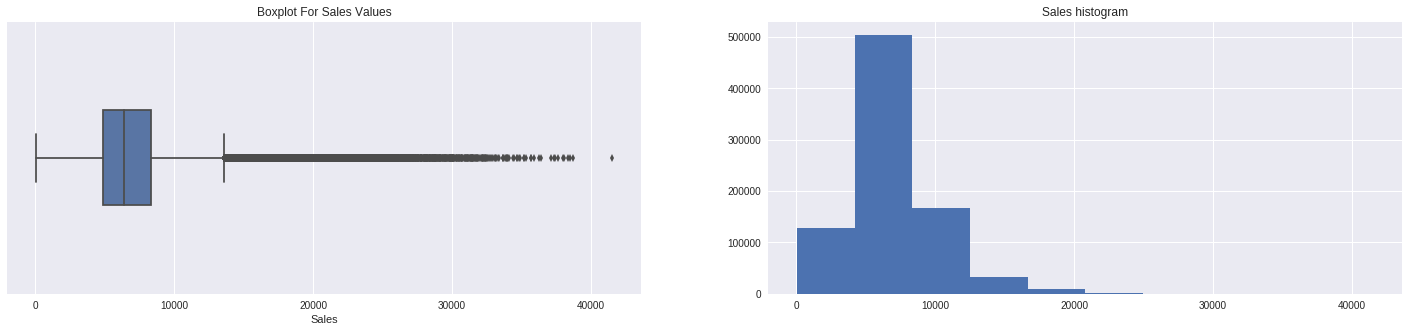

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
sns.boxplot(stores['Sales'], ax = ax[0], width = 0.35)
ax[0].set_title('Boxplot For Sales Values')
ax[1].hist(stores['Sales'])
ax[1].set_title("Sales histogram")
plt.show()

In [22]:
print('Mean : {0}\nMedian: {1}'.format(np.mean(stores['Sales']), np.median(stores['Sales'])))

Mean : 6955.959133664481
Median: 6369.0


In [23]:
stores[stores['Sales'] > 40000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date_month,Date_day,Date_year,SalePerCust
44393,909,1,2015-06-22,41551,1721,1,0,0,0,a,...,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",6,22,2015,24.143521


In [24]:
print('There are {} datapoints where sales are greater than 14000.'.format(stores[(stores['Sales'] > 14000)].shape[0]))
print('There are {} datapoints where sales are greater than 14000 with no promo running.'.format(stores[(stores['Sales'] > 14000) & (stores['Promo'] == 0)].shape[0]))

There are 27113 datapoints where sales are greater than 14000.
There are 7613 datapoints where sales are greater than 14000 with no promo running.


* The datapoint where sale is greater than 40000 seems to be an outlier as there was no promotion going on on that day.
* There are quite a few records where sales were quite high. This could be because of the type of store or the store having no competetion nearby (explored later on). 
* The dataset is slightly skewed to the right, however, as the mean and median are comparable, we can say with some confidence that there are no extreme values that is effecting the distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


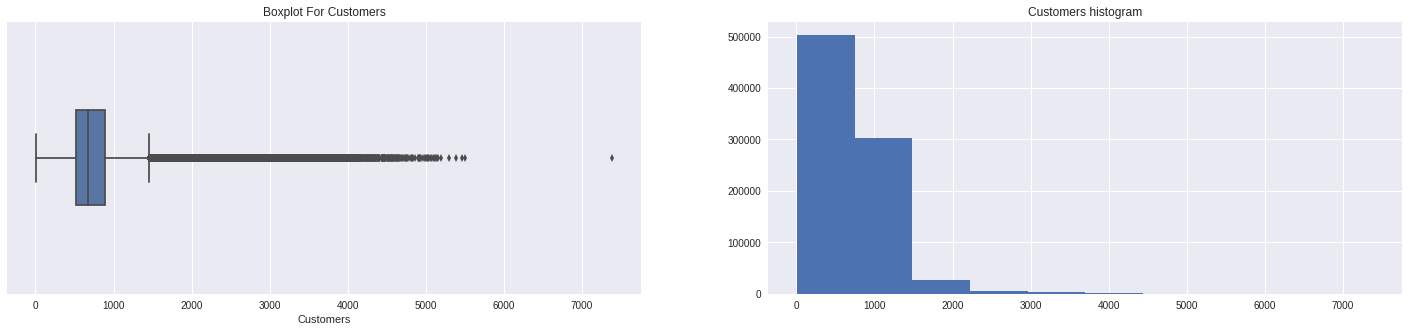

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))
sns.boxplot(stores['Customers'], ax = ax[0], width = 0.35)
ax[0].set_title('Boxplot For Customers')
ax[1].hist(stores['Customers'])
ax[1].set_title("Customers histogram")
plt.show()

In [26]:
print('Mean : {0}\nMedian: {1}'.format(np.mean(stores['Customers']), np.median(stores['Customers'])))

Mean : 762.777166253325
Median: 676.0


In [27]:
stores[stores['Customers'] > 7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date_month,Date_day,Date_year,SalePerCust
993496,817,2,2013-01-22,27190,7388,1,1,0,0,a,...,3.0,2006.0,0,NaN,NaN,NaN,1,22,2013,3.680292


In [28]:
print('There are {} datapoints where the number of customers is greater than 1500.'.format(stores[(stores['Customers'] > 1500)].shape[0]))
print('There are {} datapoints where sales are greater than 1500 with no promo running.'.format(stores[(stores['Customers'] > 1500) & (stores['Promo'] == 0)].shape[0]))

There are 36877 datapoints where the number of customers is greater than 1500.
There are 16808 datapoints where sales are greater than 1500 with no promo running.


In [29]:
stores['Sales'].corr(stores['Customers'])

0.8235517202000227

* The disrtibution for the number of customers is similar to that for sales. Infact, the two have a very strong correlation (0.82). This is understandable as the more customers the store attracts, the more sales it can make.
* A store had very high number of customers, which could be due to the promotion it was having.
* We observe a right skewness in both distributions because of the low number of outliers but the high representation of each outlier alone which pushes the distribution to the left as seen in both histograms.This typically occurs when the mean is higher than the median.

### Exploring Sales & Customers By Time Patterns


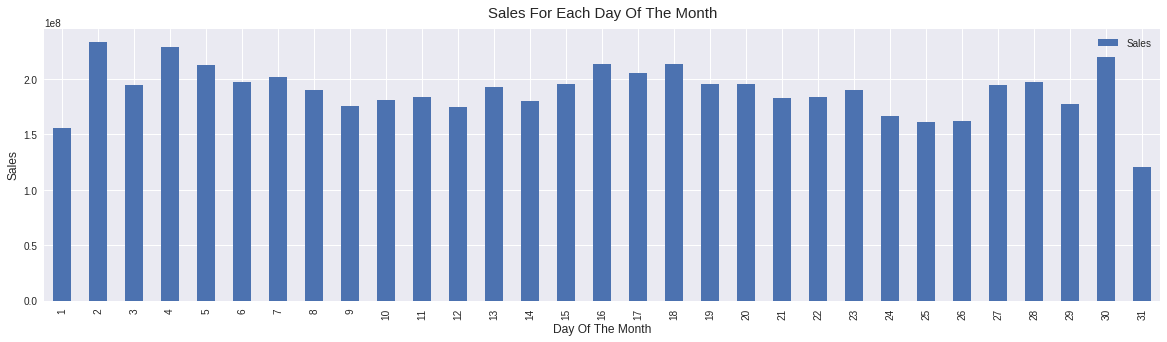

In [30]:
stores[['Sales']].groupby(stores['Date_day'], as_index = True).sum().plot(kind = 'bar', figsize = (20,5))
plt.title('Sales For Each Day Of The Month', fontsize = 15, y = 1.02)
plt.xlabel('Day Of The Month', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

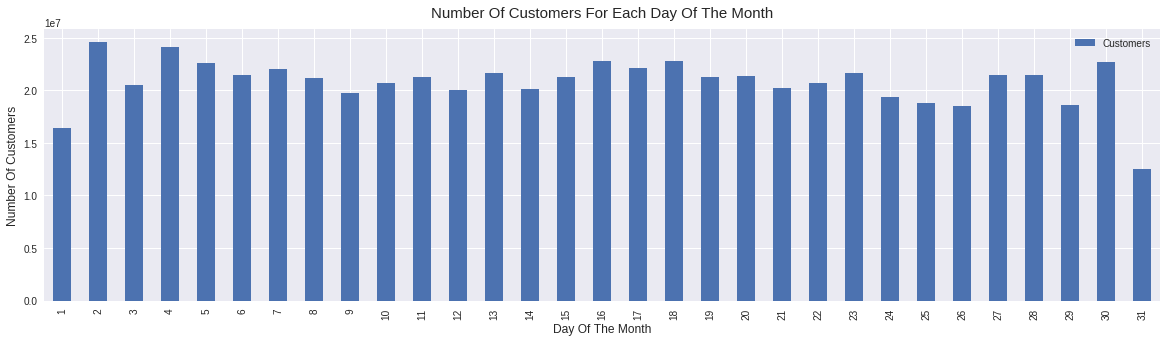

In [31]:
stores[['Customers']].groupby(stores['Date_day'], as_index = True).sum().plot(kind = 'bar', figsize = (20,5))
plt.title('Number Of Customers For Each Day Of The Month', fontsize = 15, y = 1.02)
plt.xlabel('Day Of The Month', fontsize = 12)
plt.ylabel('Number Of Customers', fontsize = 12)
plt.show()

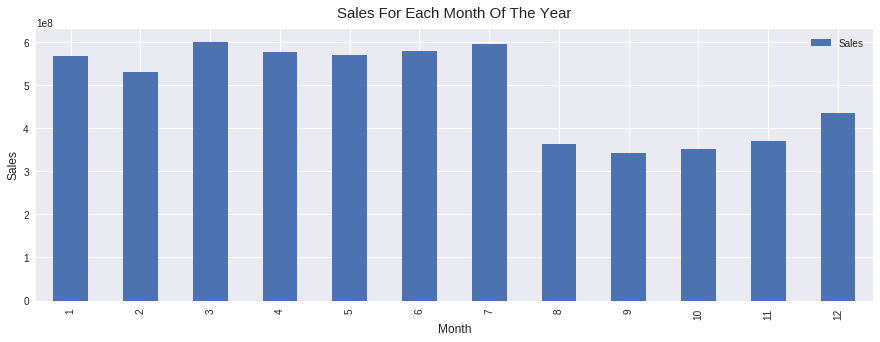

In [32]:
stores[['Sales']].groupby(stores['Date_month'], as_index = True).sum().plot(kind = 'bar', figsize = (15,5))
plt.title('Sales For Each Month Of The Year', fontsize = 15, y = 1.02)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

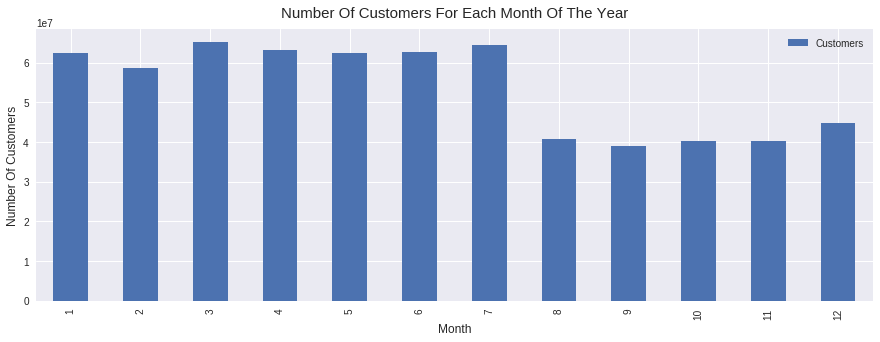

In [33]:
stores[['Customers']].groupby(stores['Date_month'], as_index = True).sum().plot(kind = 'bar', figsize = (15,5))
plt.title('Number Of Customers For Each Month Of The Year', fontsize = 15, y = 1.02)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Number Of Customers', fontsize = 12)
plt.show()

* The stores have somewhat equal amount of sales and customers from January to July. There is a considerable decrease in these figures for the months August to December.
* Amount of sales is slightly higher at the start of the month and the middle of the month.

### Exploring Other Store Features

#### Handling Missing Data

Before we can explore rest of the dataset, we need to deal with the missing values. Columns with missing values:

CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear , Promo2SinceWeek, Promo2SinceYear,             PromoInterval

##### CompetitionDistance

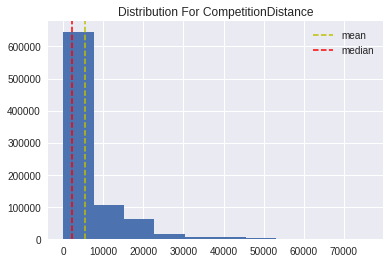

Mean : 5458.156627307185
Median: 2320.0
Std Dev: 7809.573180596647


In [34]:
stores['CompetitionDistance'].hist()
plt.axvline(stores['CompetitionDistance'].mean(), color='y', linestyle='dashed', linewidth=1.5, label = 'mean')
plt.axvline(stores['CompetitionDistance'].median(), color='r', linestyle='dashed', linewidth=1.5, label = 'median')
plt.legend()
plt.title('Distribution For CompetitionDistance')
plt.show()
print('Mean : {0}\nMedian: {1}\nStd Dev: {2}'.format(stores['CompetitionDistance'].mean(), stores['CompetitionDistance'].median(), stores['CompetitionDistance'].std()))


The distribution for this variable is highly skewed to the right with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

Therefore,  it is better to replace the missing values in this feature with the median than the mean since the mean is biased by those outliers.

In [0]:
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].median(), inplace = True)

##### CompetitionOpenSinceMonth, CompetitionOpenSinceYear

Since we have no information whatsoever on these missing values and no accurate way of filling these values, we will be replacing these with 0.

In [0]:
stores['CompetitionOpenSinceMonth'].fillna(0, inplace = True)
stores['CompetitionOpenSinceYear'].fillna(0, inplace = True)

##### Promo2SinceWeek, Promo2SinceYear, PromoInterval

In [37]:
stores[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum()

Promo2SinceWeek    423292
Promo2SinceYear    423292
PromoInterval      423292
dtype: int64

In [38]:
len(stores[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']][stores['Promo2'] == 0])

423292

All the missing values in these fields are occurring where Promo2 is 0. This means there are no continuous promotional activities for those stores.

Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [0]:
stores['Promo2SinceWeek'].fillna(0, inplace = True)
stores['Promo2SinceYear'].fillna(0, inplace = True)
stores['PromoInterval'].fillna(0, inplace = True)

In [40]:
stores.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Date_month                   0
Date_day                     0
Date_year                    0
SalePerCust                  0
dtype: int64

#### Exploring Store Types

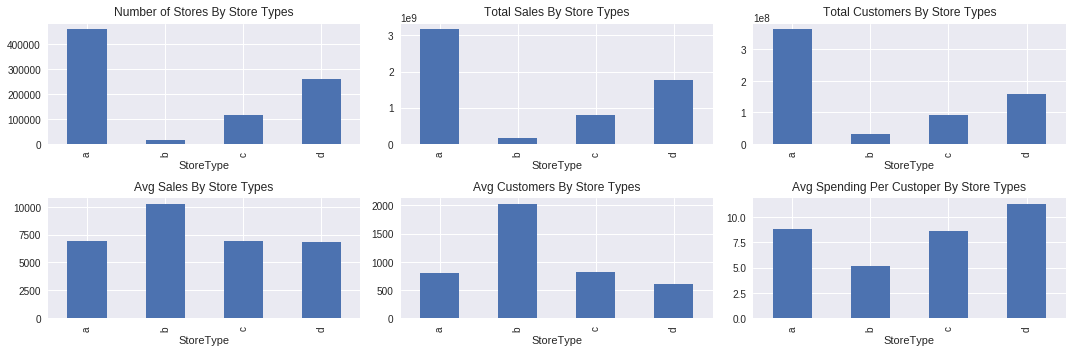

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
plt.subplots_adjust(hspace = 0.28)

stores[['Store']].groupby(stores['StoreType'], as_index = True).count().plot(kind = 'bar', ax = ax[0,0], legend = False)
ax[0,0].set_title('Number of Stores By Store Types', fontsize  = 12, y = 1.02)

stores[['Sales']].groupby(stores['StoreType'], as_index = True).sum().plot(kind = 'bar', ax = ax[0,1], legend = False)
ax[0,1].set_title('Total Sales By Store Types', fontsize  = 12, y = 1.02)

stores[['Customers']].groupby(stores['StoreType'], as_index = True).sum().plot(kind = 'bar', ax = ax[0,2], legend = False)
ax[0,2].set_title('Total Customers By Store Types', fontsize  = 12, y = 1.02)

stores[['Sales']].groupby(stores['StoreType'], as_index = True).mean().plot(kind = 'bar', ax = ax[1,0], legend = False)
ax[1,0].set_title('Avg Sales By Store Types', fontsize  = 12, y = 1.02)

stores[['Customers']].groupby(stores['StoreType'], as_index = True).mean().plot(kind = 'bar', ax = ax[1,1], legend = False)
ax[1,1].set_title('Avg Customers By Store Types', fontsize  = 12, y = 1.02)

stores[['SalePerCust']].groupby(stores['StoreType'], as_index = True).mean().plot(kind = 'bar', ax = ax[1,2], legend = False)
ax[1,2].set_title('Avg Spending Per Custoper By Store Types', fontsize  = 12, y = 1.02)

plt.tight_layout()
plt.show()

* Store type A has the highest number of stores, sales and customers but it is not the best performing store.
* Store type B has the highest average sales and highest average number of customers. 
* Store type D has the highest spending per customer.

Studying other variables such as Assortments, Competition and Promotions can help us better understand these results.

#### Exploring Assortments

Assortments have three types and each store has a defined type and assortment type:

* a means basic things
* b means extra things
* c means extended things so the highest variety of products.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


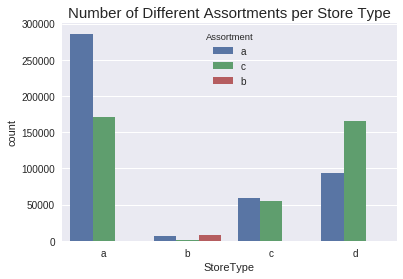

In [42]:
sns.countplot(x = 'StoreType', hue = 'Assortment', data = stores, order = ['a', 'b', 'c', 'd']).set_title("Number of Different Assortments per Store Type", fontsize = 15)
plt.show()

* Most of the stores have assortment type a or c.
* Assorment type b is scarce.
* Store type D which has the highest sale per customer has very high amount of assortment d. This could probably be the reason behind high sale per customer as having variety in stores can increase the customers' spending.

#### Exploring Promotions

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


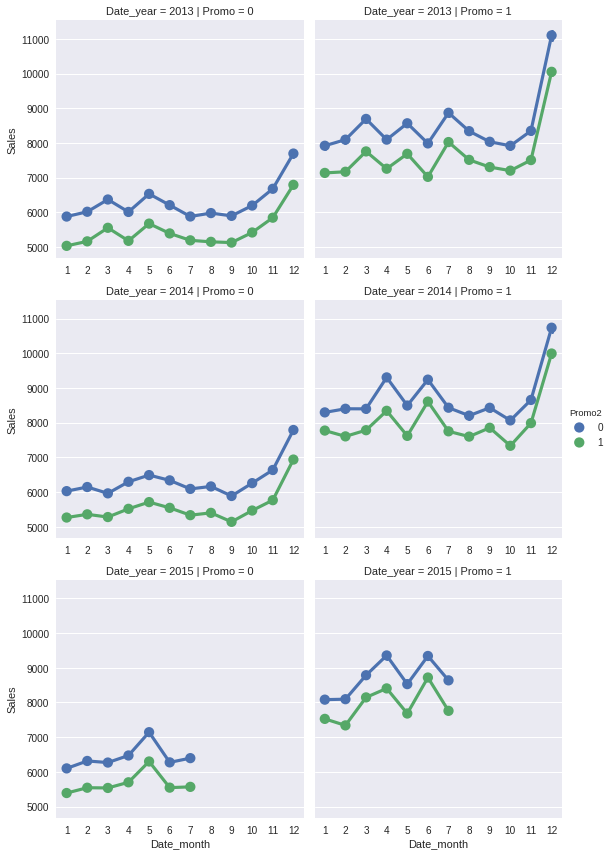

In [43]:
sns.factorplot(data = stores, x ='Date_month', y = 'Sales', col = 'Promo', hue = 'Promo2', row = 'Date_year', sharex = False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


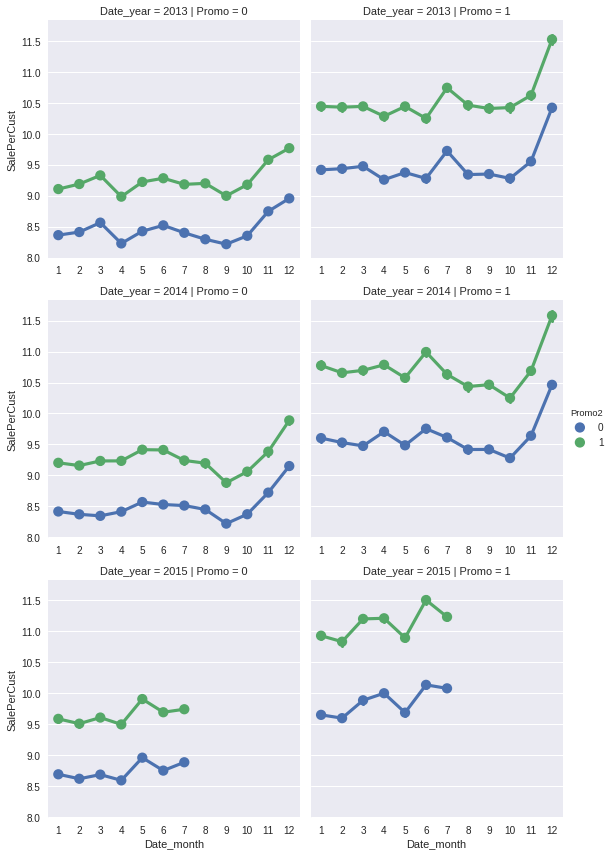

In [44]:
sns.factorplot(data = stores, x ='Date_month', y = 'SalePerCust', col = 'Promo', hue = 'Promo2', row = 'Date_year', sharex = False)
plt.show()

* Sale increases dramatically upon the introduction of promotions. We can conclude a store having promotions increases its sale quite significantly.
* Surprisingly, when there is no consecutive promotion stores tend to sell more than with consecutive promotion. 

#### Exploring Competition Distance

CompetitionDistance is a continuous variable and therefore, in order to analyze sales and customers by this variable, we need to first convert it into a categorical value.

In [45]:
stores['CompetitionDistance_cat'] = pd.cut(stores['CompetitionDistance'], 8)
stores.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Date_month,Date_day,Date_year,SalePerCust,CompetitionDistance_cat
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,7,31,2015,9.482883,"(-55.84, 9500.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,31,2015,9.702400,"(-55.84, 9500.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,31,2015,10.126675,"(9500.0, 18980.0]"


In [46]:
stores[['Sales']].groupby(stores['CompetitionDistance_cat'], as_index = True).mean()


,Sales
CompetitionDistance_cat,
"(-55.84, 9500.0]",6990.387967
"(9500.0, 18980.0]",6716.710155
"(18980.0, 28460.0]",7290.775576
"(28460.0, 37940.0]",6245.868663
"(37940.0, 47420.0]",6670.818727
"(47420.0, 56900.0]",4845.229592
"(56900.0, 66380.0]",6462.014689
"(66380.0, 75860.0]",7775.446449


In [47]:
stores[['Customers']].groupby(stores['CompetitionDistance_cat'], as_index = True).mean()

,Customers
CompetitionDistance_cat,
"(-55.84, 9500.0]",786.489398
"(9500.0, 18980.0]",628.230410
"(18980.0, 28460.0]",733.418448
"(28460.0, 37940.0]",659.910077
"(37940.0, 47420.0]",702.981308
"(47420.0, 56900.0]",474.381378
"(56900.0, 66380.0]",793.780791
"(66380.0, 75860.0]",914.574972


* Stores that have less nearby competition have higher sales and customers.
* This doesn't mean automatically that the further the competion is, the better, but it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region. 

# Machine Learning

## Data Preprocessing

In [0]:
# removing unnecessary columns
stores.drop(['Date', 'CompetitionDistance_cat', 'Open'], axis = 1, inplace = True)

In [0]:
# converting objects to categories
cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
for c in cols:
  stores[c] = stores[c].astype('category')

In [0]:
# it's not very important to distinguish between the kinds of state holidays, so we can covert this feature to a binary feature
stores['StateHoliday'] = stores['StateHoliday'].map({'0': 0, 'a' : 1, 'b' : 1, 'c' : 1})

In [0]:
# Since the variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same underlying meaning, 
# merging them into one variable, CompetitionOpenSince, makes it easier for the algorithm to understand the pattern and create less branches and thus less complex trees.
stores['CompetitionOpenSince'] = np.where((stores['CompetitionOpenSinceMonth']==0) & (stores['CompetitionOpenSinceYear']==0) , 0,(abs(stores['Date_month'] - stores['CompetitionOpenSinceMonth'])) + (12 * (abs(stores['Date_year'] - stores['CompetitionOpenSinceYear']))))

# removing CompetitionOpenSinceYear and CompeitionOpenSinceMonth
stores.drop(['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth'], axis = 1, inplace = True)

In [0]:
# creating dummy variables for categorical values
stores = pd.get_dummies(stores, columns = ['StoreType', 'Assortment', 'PromoInterval'], prefix = ['StoreType', 'Assortment', 'PromoInterval'])

In [53]:
stores['Sales'].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [0]:
# separating target variable
target = np.log(stores['Sales'])

In [0]:
stores.drop(['Sales', 'Customers', 'SalePerCust'], axis = 1, inplace = True)

In [0]:
# creating training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(stores, target, test_size = 0.2)

## Building The Model

In [0]:
# defining a performance metric
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean(((y - yhat))**2))
    return rmspe

In [62]:
from xgboost.sklearn import XGBRegressor 

model = XGBRegressor()
model.fit(x_train, y_train)
preds = model.predict(x_test)
err = rmspe(y_test, preds)
print('RMSPE: {}'.format(err))

RMSPE: 0.32713106599687236


In [63]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
preds = model.predict(x_test)
err = rmspe(y_test, preds)
print('RMSPE: {}'.format(err))

RMSPE: 0.1306614019145059


In [0]:
#from sklearn.model_selection import RandomizedSearchCV

#params = {'n_estimators' : [120,300,500,800,1200], 'max_depth' : [5,8,12,25,30, None], 'min_samples_split' : [2,5,10,15,100], 'min_samples_leaf' : [1,2,5,10], 'max_features' : ['log2', 'sqrt', None]}

#grid_obj = RandomizedSearchCV(estimator = model, param_distributions=params,cv=10)
#grid_fit = grid_obj.fit(x_train, y_train)
#best_model = grid_fit.best_estimator_
#bestpreds = best_model.predict(x_test)

#err = rmspe(y_test, bestpreds)
#print('RMSPE: {}'.format(err))

RandomForestRegressor gives a considerably low rmspe (0.13) than XGBRegressor. 0.13 is actually very good for a baseline model. Given the proper computational power, hyperparameters for this model could be tuned using grid search or randomized search to get even better predictions.

## Feature Importance

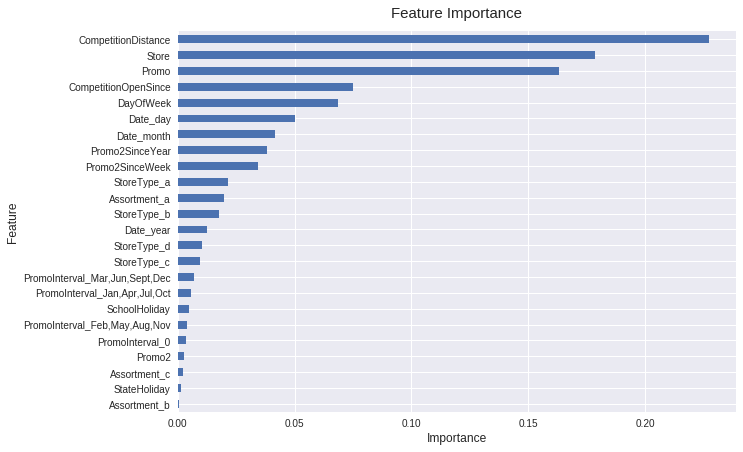

In [85]:
feature_importances = pd.DataFrame(model.feature_importances_,index = x_train.columns, columns=['importance']).sort_values('importance', ascending=True)
feature_importances.plot(kind = 'barh', figsize = (10,7), legend = False)
plt.ylabel('Feature', fontsize = 12)
plt.xlabel('Importance', fontsize = 12)
plt.title('Feature Importance', fontsize = 15, y = 1.02)
plt.show()

Here, we can see that the type of store or the kind of assortments it has very little importance when it comes to sales. Features such as competition distance, store, promo, how long competition has been open and the day of the week are much more important.